## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/social-network-ads/Social_Network_Ads.csv


## Import dataset

In [2]:
social_data =pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

## Check the data types and numbers of rows and columns

In [3]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
social_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
social_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Check missing values

In [6]:
social_data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

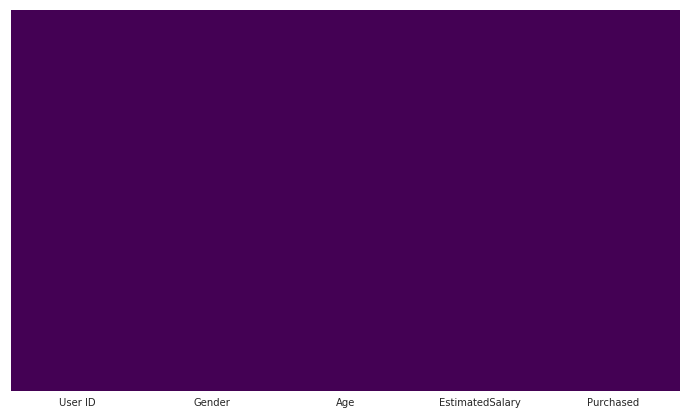

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(social_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Create X array

In [8]:
X = social_data.iloc[:,[2,3]].values

In [9]:
X.shape

(400, 2)

## Create y array

In [10]:
y = social_data.iloc[:,4].values

In [11]:
y.shape

(400,)

## Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

## Check the length of test and train dataset

In [14]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 280
Testing Set of X: 120
Training Set of y: 280
Testing Set of y: 120


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)

In [18]:
X_test = sc.fit_transform(X_test)

## Fitting the model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [21]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_predict = classifier.predict(X_test)

## Evaluate the model

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 1. Classification report

In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        80
           1       0.83      0.97      0.90        40

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120



### 2. Accuracy

In [25]:
print(accuracy_score(y_test,y_predict))

0.925


### 3. Confusion Matrix

In [26]:
print(confusion_matrix(y_test,y_predict))

[[72  8]
 [ 1 39]]


## Determine k using elbow method

In [27]:
error_rate = []
# Might take some time
for i in range(1,25):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

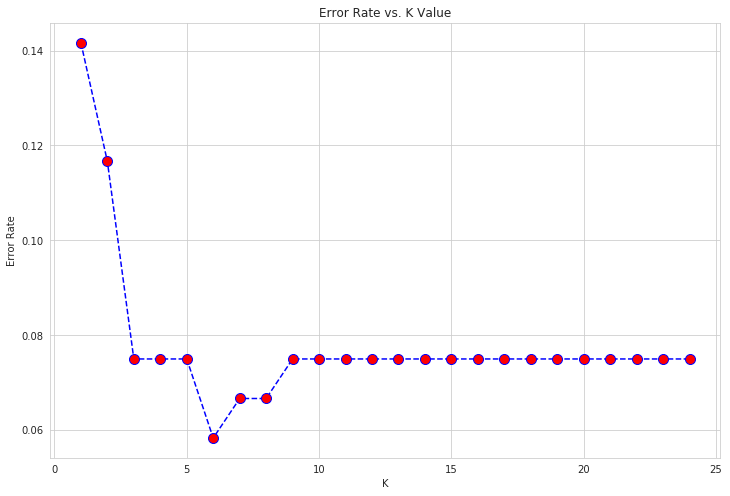

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')